In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

np.load('fit_exercise.npy')       
(x,y,error) = np.load('fit_exercise.npy')

#x=np.array([0,1,2,3,4])
#y=np.array([0,0.5,1,1.5,2])

#La varinza de y (el eje vertical) está dada por sigma
sigma=np.var(y)

#Definimos un prior plano, basados en la forma cualitativa de la gráfica de los datos
def prior(beta):
    a= beta[0]
    b= beta[1]
    if -10<a<10 and -10<b<10:
        return 0
    return -np.inf

# prior(beta):
#    a= beta[0]
#    b= beta[1]
#    if -0.5<a<0.5 and 0<b<1:
#        return 0
#    return -np.inf


#Para el likelihood, usamos la distribución Gaussiana, como es requerido en el algoritmo metrópolis
#Trabajamos con logaritmos de las cantidades. La intersección de la recta es a, la pendiente es b.
def likelihood(beta):
    a = beta[0]     # intersección
    b = beta[1]     # pendiente
    #El modelo a los que ajustaremos los datos está dado por y_modelo
    y_modelo = a  + b * x
    likelihoods=-0.5*np.sum(np.log(2*np.pi*sigma**2)+(y-y_modelo)**2/(sigma**2))
    return likelihoods

#Formamos el posterior a partir del prior y el likelihood
def posterior(beta):
    return likelihood(beta) + (prior(beta))
#Saltamos entre parámetros con una función gaussiana centrada en los parámetros
def funcion(beta):
    a = beta[0]
    b = beta[1]
    a_new = np.random.normal(a, 0.5)
    b_new = np.random.normal(b, 0.5)
    beta_new = [a_new, b_new]
    return beta_new

$\textbf{Implementación para varios caminadores, análisis de cadenas y diagnóstico Gelman-Rubin}$

Media a y b, cadena: 0 [ 4.51847803 -0.97242598]
Varianza a y b, cadena: 0 [5.52870527 0.17561075]


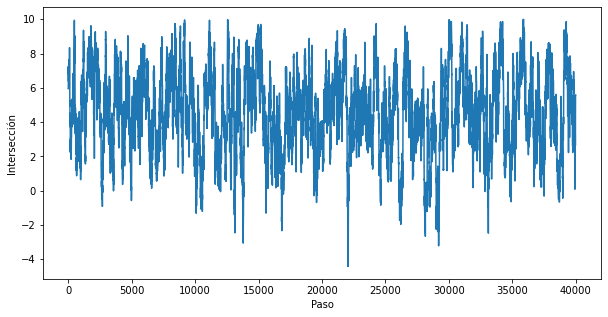

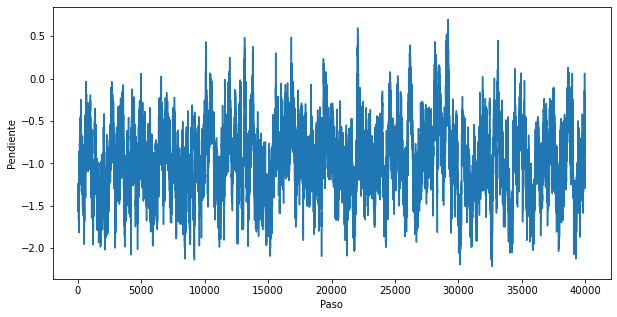

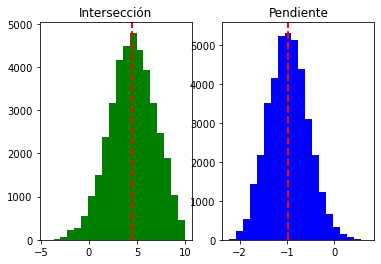

Media a y b, cadena: 1 [ 4.62906418 -0.99085792]
Varianza a y b, cadena: 1 [4.76786448 0.15634905]


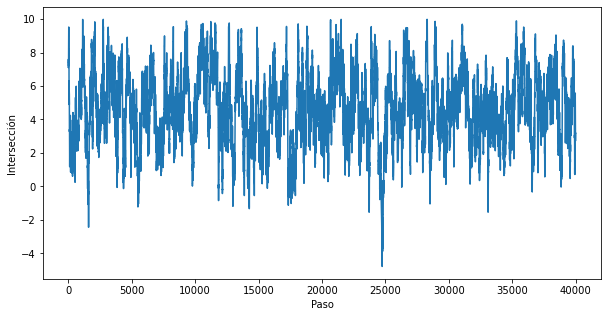

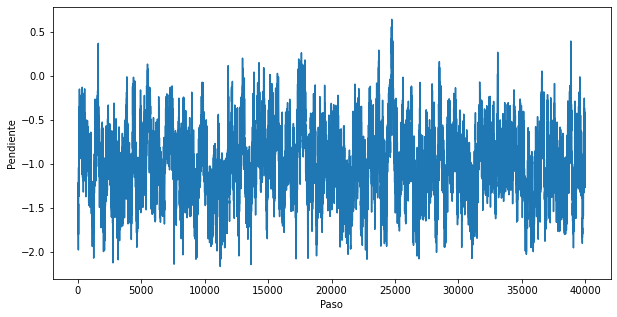

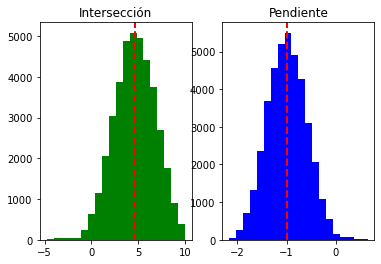

Media a y b, cadena: 2 [ 4.45695162 -0.96144936]
Varianza a y b, cadena: 2 [4.42330982 0.14611483]


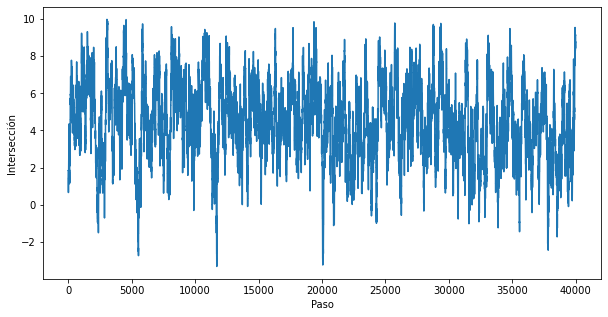

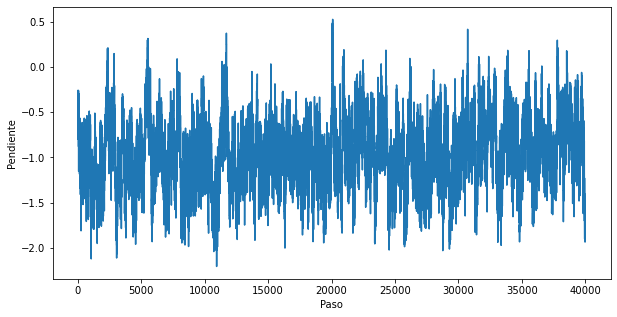

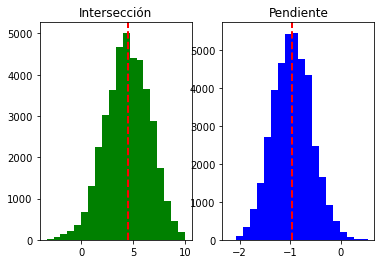

Media a y b, cadena: 3 [ 4.68811687 -0.99965115]
Varianza a y b, cadena: 3 [4.75664976 0.15749668]


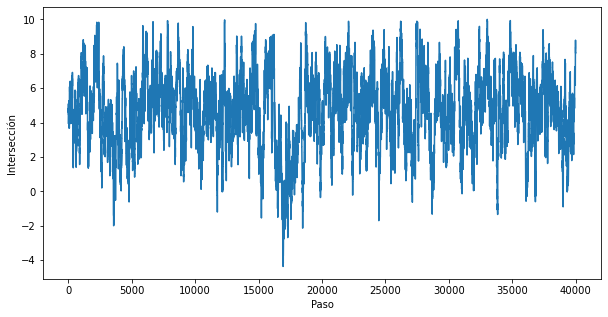

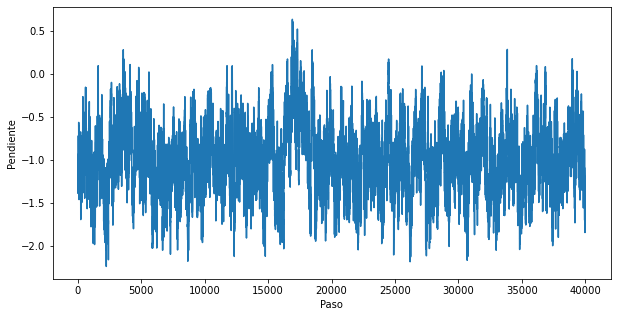

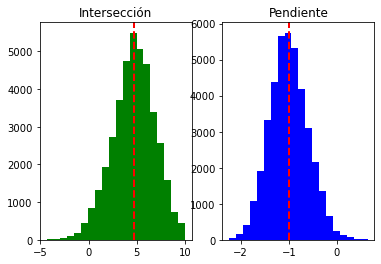

Media a y b, cadena: 4 [ 4.6810679 -1.0016685]
Varianza a y b, cadena: 4 [4.96694953 0.16357933]


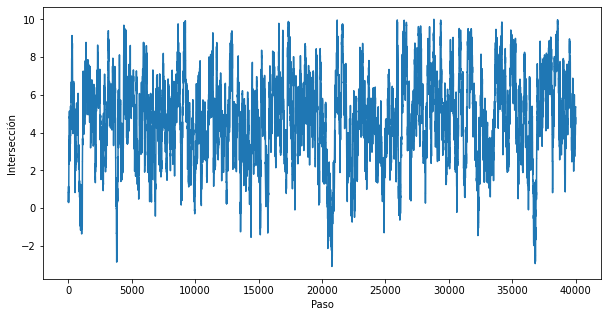

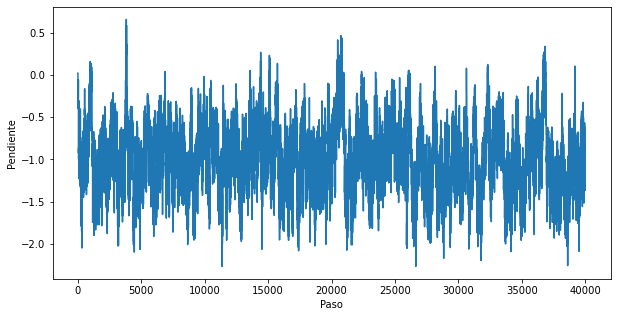

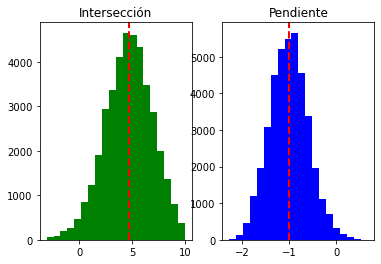

R_a = 1.000887461116592
R_b = 1.000984422887032


In [2]:
caminadores= 5
alpha=-5
beta=5

vector_a=np.zeros(caminadores)
vector_b=np.zeros(caminadores)

vector_av=np.zeros(caminadores)
vector_bv=np.zeros(caminadores)


for l in range (0, caminadores):

    #Ejecutamos el algoritmo
    beta_0 = [0.5, 0.5]        # valores iniciales de los parámetros
    resultados = np.zeros([50000,2])            # arreglo para registrar los resultados
    resultados[0,0] = beta_0[0]
    resultados[0, 1] = beta_0[1]
    for step in range(1, 50000):               #  50000 veces

        beta_old = resultados[step-1, :]
        beta_prop = funcion(beta_old)

        prob = np.exp(posterior(beta_prop) - posterior(beta_old))

        if np.random.uniform(0,1) < prob:
            resultados[step, :] = beta_prop    
        else:
            resultados[step, :] = beta_old 

    burn_in = 10000
    beta_posterior = resultados[burn_in:, :]
    a_posterior = resultados[burn_in:, 0]
    b_posterior = resultados[burn_in:, 1]
   
    #La evolución gráfica de los parámetros a y b:
    paso = []
    for i in range(40000):
        paso.append(i)
    
    plt.figure(figsize=(10,5))
    plt.plot(paso, a_posterior, '-');
    plt.xlabel('Paso')
    plt.ylabel('Intersección')
    
    plt.figure(figsize=(10,5))
    plt.plot(paso, b_posterior, '-');
    plt.xlabel('Paso')
    plt.ylabel('Pendiente')  
    
    vector_a[l]=a_posterior.mean()
    vector_av[l]=a_posterior.var()
    
    vector_b[l]=b_posterior.mean()
    vector_bv[l]=b_posterior.var()

    #Los histogramas de a y b
    print('Media a y b, cadena:',l,beta_posterior.mean(axis=0))
    print('Varianza a y b, cadena:',l,beta_posterior.var(axis=0))
        
    
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.hist(beta_posterior[:,0], bins=20, color='green')
    ax1.axvline(beta_posterior.mean(axis=0)[0], color='red', linestyle='dashed', linewidth=2)
    ax1.title.set_text('Intersección')
    ax2 = fig.add_subplot(122)
    ax2.hist(beta_posterior[:,1], bins=20, color='blue')
    ax2.axvline(beta_posterior.mean(axis=0)[1], color='red', linestyle='dashed', linewidth=2)
    ax2.title.set_text('Pendiente')
    plt.show()

#Diagnóstico de Gelman-Rubin    
        
for y in range(0,caminadores):
    Bna= (1/(caminadores-1))*np.sum((vector_a[y]-np.average(vector_a))**2)
    s2a= (1/caminadores)*np.sum(vector_av[l]) 
sigma2a=((burn_in -1)/burn_in)*s2a+Bna
    
print('R_a =', (sigma2a/s2a)**0.5)

for y in range(0,caminadores):
    Bnb= (1/(caminadores-1))*np.sum((vector_b[y]-np.average(vector_b))**2)
    s2b= (1/caminadores)*np.sum(vector_bv[l]) 
sigma2b=((burn_in -1)/burn_in)*s2b+Bnb
    
print('R_b =', (sigma2b/s2b)**0.5)


$\textbf{Gráficas de Triángulo}$


Removed no burn in


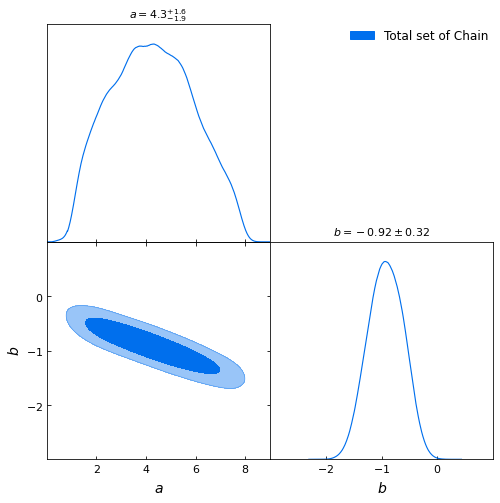

In [96]:
from getdist import plots, gaussian_mixtures
from getdist import plots, MCSamples


c_a=0
c_b=0
for z in range(0,caminadores):        
    c_a=np.append(c_a,resultados[burn_in:,0])
    c_b=np.append(c_b,resultados[burn_in:,1])
    
SampsP=np.array([c_a.T,c_b.T]).T
names = ['a0', 'b0']
labels =  ['a', 'b']
SamplesP = MCSamples(samples=SampsP,names = names, labels = labels, label='Second set')

g = plots.get_subplot_plotter(4)
g.settings.figure_legend_frame = False
g.triangle_plot([SamplesP], filled=True, 
                legend_labels = ['Total set of Chain'], legend_loc='upper right',
                title_limit=1, param_limits={'a0': (0, 9), 'b0': (-3, 1)}, markers={'a':0})